In [1]:
!nvidia-smi

Sun May 14 14:41:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installling YoloV8

In [5]:
# !pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [48]:

import torch
# model = torch.hub.load('ultralytics/yolov5','yolov5s')
model = YOLO("/content/yolov8n.pt")

In [54]:
img = "/content/346132125_914194556303335_4711088007396981983_n.jpg"
model.predict(img, save = True, save_txt = True)

Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[9.20000e+01, 3.71000e+02, 1.53300e+03, 2.04100e+03, 7.87488e-01, 0.00000e+00],
         [2.68000e+02, 6.23000e+02, 6.80000e+02, 1.97000e+03, 5.67924e-01, 3.90000e+01],
         [1.00000e+00, 1.16900e+03, 4.80000e+02, 2.04500e+03, 3.72164e-01, 0.00000e+00],
         [0.00000e+00, 1.77000e+02, 2.76000e+02, 8.88000e+02, 3.31603e-01, 3.90000e+01]], device='cuda:0')]

In [58]:

import yaml
file_name = "/content/coco8.yaml"
with open(file_name, "r") as stream:
  names = yaml.safe_load(stream)["names"]

print(names.get(39,None))


bottle


In [95]:
lis = open("/content/runs/detect/predict/labels/346132125_914194556303335_4711088007396981983_n.txt", "r").readlines()

for pred in lis:
  classes = int(pred.split()[0])
  if classes == 39 : 
    coordinate = pred.split()
    print(coordinate)
    xc, yc, nw, nh = float(coordinate[1]), float(coordinate[2]), float(coordinate[3]), float(coordinate[4])
    # break


['39', '0.0898438', '0.26001', '0.179688', '0.347168']
['39', '0.308594', '0.633057', '0.268229', '0.657715']


In [96]:
xc, yc, nw, nh

(0.308594, 0.633057, 0.268229, 0.657715)

In [97]:
img = cv2.imread("/content/346132125_914194556303335_4711088007396981983_n.jpg")
h, w = img.shape[0], img.shape[1]
h, w

(2048, 1536)

In [98]:
xc  *= w 
yc *= h 
nw *= w 
nh *= h 
top_left = int(xc-nw/2), int(yc-nh/2)
bottom_right = int(xc+nw/2), int(yc+nh/2)


In [99]:
top_left, bottom_right

((268, 623), (680, 1970))

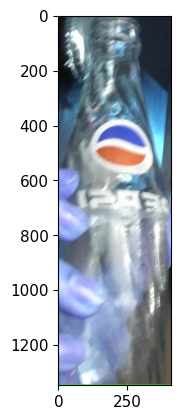

In [101]:

image = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 3 )
# plt.imshow(image)
crop_img = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.imshow(crop_img)

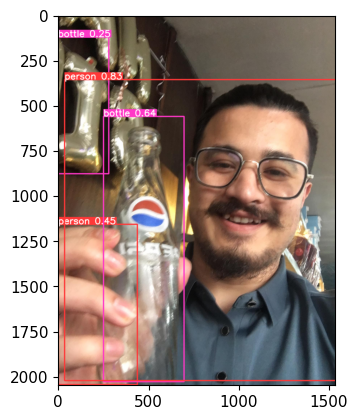

In [34]:
img = "/content/346132125_914194556303335_4711088007396981983_n.jpg"
result = model(img)


%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [44]:
result

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 2048x1536 2 persons, 2 bottles
Speed: 54.0ms pre-process, 48.0ms inference, 1.5ms NMS per image at shape (1, 3, 640, 480)

In [45]:
# Iterate over each predicted box
import cv2
image = cv2.imread(img)
image_width, image_height = image.shape[1], image.shape[0]
for prediction in result:
    # Extract the x, y coordinates of the center of the box, as well as its width and height
    x, y, width, height, confidence, class_probabilities = prediction

    # Convert the coordinates and size of the box to the top-left and bottom-right coordinates of the bounding box
    x_min = int((x - (width / 2)) * image_width)
    y_min = int((y - (height / 2)) * image_height)
    x_max = int((x + (width / 2)) * image_width)
    y_max = int((y + (height / 2)) * image_height)

    # Return the bounding box coordinates as a tuple
    bbox = (x_min, y_min, x_max, y_max)

TypeError: ignored

In [35]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 165k/165k [00:00<00:00, 65.2MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 62.0ms
Speed: 0.5ms pre-process, 62.0ms inference, 95.5ms postprocess per image at shape (1, 3, 640, 640)
